# Artificial Neural Network

### Importing the libraries

In [30]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

In [2]:
tf.__version__

'2.1.0'

## Part 1 - Data Preprocessing

### Importing the dataset

In [3]:
dataset = pd.read_csv('Churn_Modelling.csv')
X = dataset.iloc[:, 3:-1].values
y = dataset.iloc[:, -1].values

In [4]:
print(X)

[[619 'France' 'Female' ... 1 1 101348.88]
 [608 'Spain' 'Female' ... 0 1 112542.58]
 [502 'France' 'Female' ... 1 0 113931.57]
 ...
 [709 'France' 'Female' ... 0 1 42085.58]
 [772 'Germany' 'Male' ... 1 0 92888.52]
 [792 'France' 'Female' ... 1 0 38190.78]]


In [5]:
print(y)

[1 0 1 ... 1 1 0]


### Encoding categorical data

Label Encoding the "Gender" column

In [6]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:, 2] = le.fit_transform(X[:, 2])

In [7]:
print(X)

[[619 'France' 0 ... 1 1 101348.88]
 [608 'Spain' 0 ... 0 1 112542.58]
 [502 'France' 0 ... 1 0 113931.57]
 ...
 [709 'France' 0 ... 0 1 42085.58]
 [772 'Germany' 1 ... 1 0 92888.52]
 [792 'France' 0 ... 1 0 38190.78]]


One Hot Encoding the "Geography" column

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1])], remainder='passthrough')
X = np.array(ct.fit_transform(X))

In [9]:
print(X)

[[1.0 0.0 0.0 ... 1 1 101348.88]
 [0.0 0.0 1.0 ... 0 1 112542.58]
 [1.0 0.0 0.0 ... 1 0 113931.57]
 ...
 [1.0 0.0 0.0 ... 0 1 42085.58]
 [0.0 1.0 0.0 ... 1 0 92888.52]
 [1.0 0.0 0.0 ... 1 0 38190.78]]


### Feature Scaling

In [10]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [11]:
print(X)

[[ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167  0.97024255
   0.02188649]
 [-1.00280393 -0.57873591  1.74273971 ... -1.54776799  0.97024255
   0.21653375]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
   0.2406869 ]
 ...
 [ 0.99720391 -0.57873591 -0.57380915 ... -1.54776799  0.97024255
  -1.00864308]
 [-1.00280393  1.72790383 -0.57380915 ...  0.64609167 -1.03067011
  -0.12523071]
 [ 0.99720391 -0.57873591 -0.57380915 ...  0.64609167 -1.03067011
  -1.07636976]]


### Splitting the dataset into the Training set and Test set

In [12]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

## Part 2 - Building the ANN

### Initializing the ANN

In [13]:
ann = tf.keras.models.Sequential()

### Adding the input layer and the first hidden layer

In [14]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the second hidden layer

In [15]:
ann.add(tf.keras.layers.Dense(units=6, activation='relu'))

### Adding the output layer

In [16]:
ann.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Training the ANN

### Compiling the ANN

In [17]:
ann.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the ANN on the Training set

In [45]:
model_history = ann.fit(X_train, y_train, batch_size = 32, epochs = 100,validation_data=(X_test, y_test))

Train on 8000 samples, validate on 2000 samples
Epoch 1/100
8000/8000 [==============================] - 1s 167us/sample - loss: 0.3313 - accuracy: 0.8661 - val_loss: 0.3372 - val_accuracy: 0.8585
Epoch 2/100
8000/8000 [==============================] - 0s 58us/sample - loss: 0.3312 - accuracy: 0.8651 - val_loss: 0.3348 - val_accuracy: 0.8645
Epoch 3/100
8000/8000 [==============================] - 0s 57us/sample - loss: 0.3315 - accuracy: 0.8646 - val_loss: 0.3358 - val_accuracy: 0.8625
Epoch 4/100
8000/8000 [==============================] - 0s 59us/sample - loss: 0.3314 - accuracy: 0.8637 - val_loss: 0.3355 - val_accuracy: 0.8590
Epoch 5/100
8000/8000 [==============================] - 0s 58us/sample - loss: 0.3309 - accuracy: 0.8661 - val_loss: 0.3335 - val_accuracy: 0.8630
Epoch 6/100
8000/8000 [==============================] - 0s 60us/sample - loss: 0.3314 - accuracy: 0.8656 - val_loss: 0.3350 - val_accuracy: 0.8620
Epoch 7/100
8000/8000 [==============================] - 0s 60u

8000/8000 [==============================] - 1s 79us/sample - loss: 0.3302 - accuracy: 0.8661 - val_loss: 0.3352 - val_accuracy: 0.8595
Epoch 56/100
8000/8000 [==============================] - 1s 82us/sample - loss: 0.3304 - accuracy: 0.8666 - val_loss: 0.3327 - val_accuracy: 0.8675
Epoch 57/100
8000/8000 [==============================] - 1s 69us/sample - loss: 0.3307 - accuracy: 0.8673 - val_loss: 0.3335 - val_accuracy: 0.8610
Epoch 58/100
8000/8000 [==============================] - 1s 93us/sample - loss: 0.3306 - accuracy: 0.8658 - val_loss: 0.3347 - val_accuracy: 0.8605
Epoch 59/100
8000/8000 [==============================] - 1s 70us/sample - loss: 0.3304 - accuracy: 0.8659 - val_loss: 0.3356 - val_accuracy: 0.8595
Epoch 60/100
8000/8000 [==============================] - 1s 85us/sample - loss: 0.3300 - accuracy: 0.8655 - val_loss: 0.3328 - val_accuracy: 0.8645
Epoch 61/100
8000/8000 [==============================] - 1s 124us/sample - loss: 0.3304 - accuracy: 0.8645 - val_loss:

## Part 4 - Making the predictions and evaluating the model

### Predicting the Test set results

In [46]:
y_pred = ann.predict(X_test)
y_pred = (y_pred > 0.5)

print(np.concatenate((y_pred.reshape(len(y_pred),1), y_test.reshape(len(y_test),1)),1))

[[0 0]
 [0 1]
 [0 0]
 ...
 [0 0]
 [0 0]
 [0 0]]


### Making the Confusion Matrix

In [47]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
print(cm)

[[1514   81]
 [ 198  207]]


In [48]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


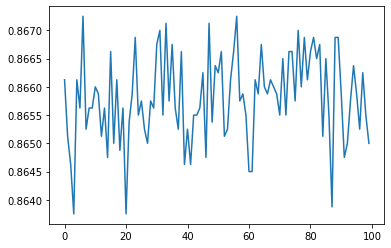

In [49]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])

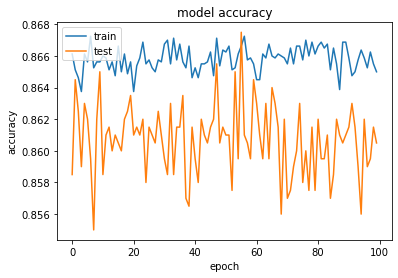

In [51]:
# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

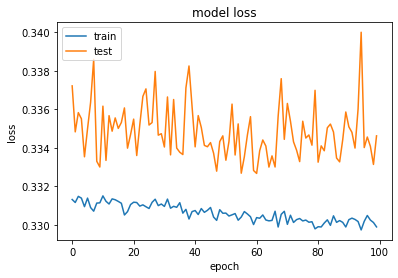

In [52]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train','test'], loc='upper left')
plt.show()

In [56]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)
score

0.8605